In [ ]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


In [ ]:
pip install readability

  Preparing metadata (setup.py) ... done
  Created wheel for readability: filename=readability-0.3.1-py3-none-any.whl size=35460 sha256=4e62ea96b13ab0944aef3638707516a4041e2b0195f5f858aad537daca19cba2
  Stored in directory: /root/.cache/pip/wheels/05/07/4d/2e3a0aaba1713619a403e1a3c56e88a6fc12d753872b98771c
Successfully built readability


In [ ]:
pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 3.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip install transformers textstat sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.6 MB/s eta 0:00:00


In [ ]:
!pip install fuzzywuzzy

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
import openai

def chat_gpt(prompt):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content.strip()

client = openai.OpenAI(
    api_key= "Hide my Key"
)


In [ ]:
import google.generativeai as genai
from google.colab import userdata


GOOGLE_API_KEY='Hide my Key'

genai.configure(api_key=GOOGLE_API_KEY)

def gemini(prompt):
  model = genai.GenerativeModel('gemini-1.5-flash')
  return model.generate_content(prompt).text.strip()

In [ ]:
def prompt_constructor(question, proof):
  if proof:
    return question +  f"Format your response as follows with notes if any: '{{\"Proof\": \"<answer>\", \"Notes\": \"<notes>\", "
  else:
    return question +  f"Format your response as follows: '{{\"My Answer\": \"<answer>\", \"Explanation\": \"<explanation>\""

In [ ]:
import pandas as pd
import re
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import textstat
from collections import Counter
from fuzzywuzzy import fuzz

bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

def normalize_answer(answer):
    return re.sub(r'\s*(miles|mile|km|kilometers|kilometer)\s*', '', answer.strip().lower())

def compare_answers(proof, ground_truth, tolerance=95):
    norm_proof = normalize_answer(proof)
    norm_ground_truth = normalize_answer(ground_truth)

    proof_num = re.findall(r'\d+', norm_proof)
    ground_truth_num = re.findall(r'\d+', norm_ground_truth)

    if proof_num and ground_truth_num:
        return proof_num[-1] == ground_truth_num[-1]

    similarity = fuzz.ratio(norm_proof, norm_ground_truth)
    return similarity >= tolerance

def get_last_number(string):
    pattern = r'\d+'

    numbers = re.findall(pattern, string)

    if numbers:
        last_number = numbers[-1]
        return last_number
    else:
        return None

def calculate_readability(text):
    flesch_kincaid = textstat.flesch_kincaid_grade(text)
    gunning_fog = textstat.gunning_fog(text)

    words = text.split()
    types = set(words)
    ttr = len(types) / len(words) if words else 0
    word_counts = Counter(words)
    hapax_legomena = sum(1 for count in word_counts.values() if count == 1) / len(words) if words else 0
    return {
        'flesch_kincaid': flesch_kincaid,
        'gunning_fog': gunning_fog,
        'ttr': ttr,
        'hapax_legomena': hapax_legomena
    }

def semantic_similarity(text1, text2):
    embeddings1 = bert_model.encode([text1])
    embeddings2 = bert_model.encode([text2])
    similarity = cosine_similarity(embeddings1, embeddings2)[0][0]
    return similarity

def key_term_relevance(prompt, proof):
    prompt_terms = set(prompt.lower().split())
    proof_terms = set(proof.lower().split())
    common_terms = prompt_terms & proof_terms
    return len(common_terms) / len(prompt_terms) if prompt_terms else 0

def evaluate_proof_quality(prompt, proof, ground_truth):
    readability_scores = calculate_readability(proof)
    semantic_score = semantic_similarity(proof, ground_truth)
    relevance_score = key_term_relevance(prompt, proof)
    return {
        'readability_flesch_kincaid': readability_scores['flesch_kincaid'],
        'readability_gunning_fog': readability_scores['gunning_fog'],
        'ttr': readability_scores['ttr'],
        'hapax_legomena': readability_scores['hapax_legomena'],
        'semantic_similarity': semantic_score,
        'relevance': relevance_score
    }

def evaluate_proof_accuracy(proof, ground_truth, bool_p):
    if not bool_p:
      return compare_answers(proof, ground_truth)
    semantic_score = semantic_similarity(proof, ground_truth)
    threshold = 0.8  # This is what we landed on
    return semantic_score >= threshold

def extract_text_between_keys(response, start_key, end_key=None):
    start_idx = response.find(start_key)
    if start_idx == -1:
        return ""

    start_idx += len(start_key) + 3
    if end_key:
        end_idx = response.find(end_key, start_idx)
        if end_idx == -1:
            return response[start_idx:].strip('", ')
        return response[start_idx:end_idx].strip('", ')
    return response[start_idx:].strip('", ')


def evaluate_consistency(prompt, ground_truth, generate_response_fn, bool_p,num_samples=5):
    scores = []
    proof_texts = []
    for i in range(num_samples):
        proof_t = generate_response_fn(prompt)
        proof_texts.append(proof_t)
        if bool_p:
          proof = extract_text_between_keys(proof_t, '"Proof"', '"Notes"')
          accuracy = evaluate_proof_accuracy(proof, ground_truth, bool_p)
        else:
          # get explanation part (not answer)
          proof = extract_text_between_keys(proof_t, '"Explanation"')
          # get answer part
          ans = extract_text_between_keys(proof_t, '"My Answer"', '"Explanation"')
          accuracy = evaluate_proof_accuracy(ans, get_last_number(ground_truth), bool_p)
        proof_quality = evaluate_proof_quality(prompt, proof, ground_truth)
        score = {
            f'accuracy_{i+1}': accuracy,
            f'readability_flesch_kincaid_{i+1}': proof_quality['readability_flesch_kincaid'],
            f'readability_gunning_fog_{i+1}': proof_quality['readability_gunning_fog'],
            f'ttr_{i+1}': proof_quality['ttr'],
            f'hapax_legomena_{i+1}': proof_quality['hapax_legomena'],
            f'semantic_similarity_{i+1}': proof_quality['semantic_similarity'],
            f'relevance_{i+1}': proof_quality['relevance']
        }
        scores.append(score)

    average_scores = {
        'accuracy': np.mean([score[f'accuracy_{i+1}'] for i, score in enumerate(scores)]),
        'readability_flesch_kincaid': np.mean([score[f'readability_flesch_kincaid_{i+1}'] for i, score in enumerate(scores)]),
        'readability_gunning_fog': np.mean([score[f'readability_gunning_fog_{i+1}'] for i, score in enumerate(scores)]),
        'ttr': np.mean([score[f'ttr_{i+1}'] for i, score in enumerate(scores)]),
        'hapax_legomena': np.mean([score[f'hapax_legomena_{i+1}'] for i, score in enumerate(scores)]),
        'semantic_similarity': np.mean([score[f'semantic_similarity_{i+1}'] for i, score in enumerate(scores)]),
        'relevance': np.mean([score[f'relevance_{i+1}'] for i, score in enumerate(scores)])
    }

    for i, proof_text in enumerate(proof_texts):
        average_scores[f'proof_text_{i+1}'] = proof_text
    for score in scores:
        average_scores.update(score)
    return average_scores

def evaluate_dataframe(df, generate_response_fn):
    results = []
    for _, row in df.iterrows():
        bool_p = False
        if ("proof" in row['prompt'].lower().split()) or ("prove" in row['prompt'].lower().split()) or ("create" in row['prompt'].lower().split()):
            bool_p = True
        prompt = prompt_constructor(row['prompt'], bool_p)
        ground_truth = row['ground_truth']
        scores = evaluate_consistency(prompt, ground_truth, generate_response_fn, bool_p)


        result = {
            'prompt': prompt,
            'ground_truth': ground_truth,
            'accuracy': scores['accuracy'],
            'readability_flesch_kincaid': scores['readability_flesch_kincaid'],
            'readability_gunning_fog': scores['readability_gunning_fog'],
            'ttr': scores['ttr'],
            'hapax_legomena': scores['hapax_legomena'],
            'semantic_similarity': scores['semantic_similarity'],
            'relevance': scores['relevance']
        }
        for key, value in scores.items():
            if key not in list(result.keys()):
                result[key] = value

        results.append(result)
    return pd.DataFrame(results)


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
df = pd.read_csv('/content/CS263_Project_Dataset.csv')
df.columns = ['prompt', 'ground_truth'] + list(df.columns[2:])

results_chat_df = evaluate_dataframe(df, chat_gpt)

In [ ]:
results_df

,prompt,ground_truth,accuracy,readability_flesch_kincaid,readability_gunning_fog,ttr,hapax_legomena,semantic_similarity,relevance,proof_text_1,...,hapax_legomena_4,semantic_similarity_4,relevance_4,accuracy_5,readability_flesch_kincaid_5,readability_gunning_fog_5,ttr_5,hapax_legomena_5,semantic_similarity_5,relevance_5
0,"Sally lives 3 miles directly West of Jimmy. Kenny lives 5 miles directly North of Jimmy. What is the distance from Sally’s house and Kenny’s House?Format your response as follows: '{""My Answer"": ""<answer>"", ""Explanation"": ""<explanation>""","Due to pythagorean theorem, the answer is the square root of (3^2) + (5^2), or in other words, the square root of 34 which is 6.08 miles. This is due to the fact that a line west and north from Jimmy’s house create a right triangle, where the distance from Sally’s house to Kenny’s house is the hypotenuse.",0.0,7.56,9.338,0.688348,0.512611,0.845417,0.446667,"{""My Answer"": ""5 miles"", ""Explanation"": ""Sally and Kenny are perpendicular to each other, forming a right triangle with Jimmy at the right angle. Using the Pythagorean theorem, we can calculate the distance between Sally's and Kenny's house as the hypotenuse of this right triangle. The distance is sqrt(3^2 + 5^2) = sqrt(9 + 25) = sqrt(34) ≈ 5 miles.""}",...,0.404040,0.867141,0.533333,False,6.1,8.15,0.796296,0.611111,0.832330,0.466667
1,"Create an identity for the expression 2tan𝜃sec𝜃 by rewriting strictly in terms of sine.Format your response as follows with notes if any: '{""Proof"": ""<answer>"", ""Notes"": ""<notes>"",","Using the definitions of tan, sec, and the trig identity sin^2(𝜃) + cos^2(𝜃) = 1\nWe have\n2tan𝜃sec𝜃 = 2(sin𝜃/cos𝜃)(1/cos𝜃) = 2sin𝜃/cos^2𝜃 = 2sin𝜃/(1 - sin^2𝜃)\n\nAnd after substituting (1 - sin^2𝜃) for cos^2𝜃:\n\n2tan𝜃sec𝜃 = 2sin𝜃/(1 - sin^2𝜃)",0.4,13.58,0.880,0.902857,0.834286,0.688025,0.023077,"{""Proof"": ""2tan𝜃sec𝜃 = 2(sinx/cosx)(1/cosx) = 2sinx/cos^2x = 2sinx/(1-sin^2x)"", ""Notes"": ""The expression 2tan𝜃sec𝜃 can be rewritten strictly in terms of sine using trigonometric identities.""}",...,0.600000,0.866016,0.038462,False,20.2,0.40,1.000000,1.000000,0.650758,0.000000
2,"Prove that the composition of any two decreasing functions is increasing.Format your response as follows with notes if any: '{""Proof"": ""<answer>"", ""Notes"": ""<notes>"",","Let f and g be given decreasing functions. We claim that f ◦ g is increasing. Given numbers x < y, we need to show that (f ◦ g)(x) < (f ◦ g)(y). First note that because g is decreasing, g(x) > g(y) or equivalently g(y) < g(x). Meanwhile, f is decreasing. Applying the definition of “decreasing” to f and the numbers g(y) and g(x), we see that f(g(y)) > f(g(x)) or equivalently (f ◦ g)(x) < (f ◦ g)(y). As x, y were arbitrary numbers satisfying x < y, we’ve shown that f ◦ g is increasing. (And as f and g were arbitrary decreasing functions, we’ve shown that the composition of any two decreasing functions is increasing.)",1.0,5.06,7.494,0.607280,0.390289,0.901781,0.391304,"""Proof"": ""Let f(x) and g(x) be two decreasing functions. Given that f(x) is decreasing, we have f(x1) > f(x2) for any x1 < x2. Also, g(x) is decreasing, so g(y1) > g(y2) for any y1 < y2. \n\nNow, consider the composition h(x) = g(f(x)). We want to show that h(x1) < h(x2) for any x1 < x2. \n\nAssume x1 < x2. By the definition of decreasing functions, we know that f(x1) > f(x2) and g(y1) > g(y2) for x1 < x2 and y1 < y2. \n\nSince f(x1) > f(x2), we can substitute f(x1) into g(y), giving us g(f(x1)) > g(f(x2)). \n\nThis implies h(x1) > h(x2), showing that the composition of two decreasing functions is indeed increasing."", \n""Notes"": ""This proof relies on the properties of decreasing functions and the definition of composition. By carefully examining the inequalities involved, we can see that the composition of decreasing functions results in an increasing function.""}",...,0.469136,0.882979,0.391304,True,5.5,8.08,0.666667,0.456790,0.930933,0.347826
3,"Prove that the sum of

In [ ]:
results_chat_df.columns

Index(['prompt', 'ground_truth', 'accuracy', 'readability_flesch_kincaid',
       'readability_gunning_fog', 'ttr', 'hapax_legomena',
       'semantic_similarity', 'relevance', 'proof_text_1', 'proof_text_2',
       'proof_text_3', 'proof_text_4', 'proof_text_5', 'accuracy_1',
       'readability_flesch_kincaid_1', 'readability_gunning_fog_1', 'ttr_1',
       'hapax_legomena_1', 'semantic_similarity_1', 'relevance_1',
       'accuracy_2', 'readability_flesch_kincaid_2',
       'readability_gunning_fog_2', 'ttr_2', 'hapax_legomena_2',
       'semantic_similarity_2', 'relevance_2', 'accuracy_3',
       'readability_flesch_kincaid_3', 'readability_gunning_fog_3', 'ttr_3',
       'hapax_legomena_3', 'semantic_similarity_3', 'relevance_3',
       'accuracy_4', 'readability_flesch_kincaid_4',
       'readability_gunning_fog_4', 'ttr_4', 'hapax_legomena_4',
       'semantic_similarity_4', 'relevance_4', 'accuracy_5',
       'readability_flesch_kincaid_5', 'readability_gunning_fog_5', 'ttr_5',

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
def check_proof(prompt):
    words = prompt.lower().split()
    return any(word in words for word in ["proof", "prove", "create"])

In [ ]:
results_chat_df['is_proof'] = results_chat_df['prompt'].apply(check_proof)

In [ ]:
results_chat_df.to_csv('results_chat_df.csv', index=False)

In [ ]:
def check_proof(prompt):
    words = prompt.lower().split()
    return any(word in words for word in ["proof", "prove", "create"])

In [ ]:
results_chat_df['is_proof'] = results_chat_df['prompt'].apply(check_proof)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/CS263_Project_Dataset.csv')
df.columns = ['prompt', 'ground_truth'] + list(df.columns[2:])

results_gem_df = evaluate_dataframe(df, gemini)

In [ ]:
def check_proof(prompt):
    words = prompt.lower().split()
    return any(word in words for word in ["proof", "prove", "create"])

In [ ]:
results_gem_df['is_proof'] = results_gem_df['prompt'].apply(check_proof)

In [ ]:
results_gem_df.to_csv('results_gem_df.csv', index=False)

In [ ]:
results_gem_df

,prompt,ground_truth,accuracy,readability_flesch_kincaid,readability_gunning_fog,ttr,hapax_legomena,semantic_similarity,relevance,proof_text_1,...,semantic_similarity_4,relevance_4,accuracy_5,readability_flesch_kincaid_5,readability_gunning_fog_5,ttr_5,hapax_legomena_5,semantic_similarity_5,relevance_5,is_proof
0,Sally lives 3 miles directly West of Jimmy. Ke...,"Due to pythagorean theorem, the answer is the ...",0.0,6.36,7.632,0.602486,0.427666,0.809252,0.286667,"```json\n{""My Answer"": ""5.83 miles"", ""Explanat...",...,0.759986,0.300000,False,7.3,8.76,0.573034,0.415730,0.797902,0.300000,False
1,Create an identity for the expression 2tan𝜃sec...,"Using the definitions of tan, sec, and the tri...",1.0,19.00,1.600,0.714286,0.571429,0.843835,0.038462,"```json\n{""Proof"": ""2tan𝜃sec𝜃 = 2(sin𝜃/cos𝜃)(1...",...,0.843835,0.038462,True,19.0,1.60,0.714286,0.571429,0.843835,0.038462,True
2,Prove that the composition of any two decreasi...,Let f and g be given decreasing functions. We ...,1.0,3.40,6.190,0.591801,0.354024,0.915037,0.330435,"```json\n{""Proof"": ""Let f and g be decreasing ...",...,0.852662,0.391304,True,3.2,5.25,0.617284,0.370370,0.934179,0.260870,True
3,Prove that the sum of any two decreasing funct...,"Let f and g be decreasing functions, and x < y...",1.0,3.22,5.974,0.610690,0.375654,0.892807,0.266667,"```json\n{""Proof"": ""Let f(x) and g(x) be two d...",...,0.886159,0.333333,True,2.5,5.00,0.740000,0.540000,0.931157,0.303030,True
4,"Prove that the function g : N → N, defined by ...","To prove a function, f : A → B is surjective, ...",0.0,5.64,7.814,0.614596,0.412409,0.626280,0.328571,"```json\n{""Proof"": ""The function g(n) = ⌊n/3⌋ ...",...,0.601204,0.321429,False,6.0,8.28,0.625000,0.412500,0.658631,0.321429,True
5,Recall that a real polynomial of degree n is a...,Suppose such a real polynomial f(x) of degree ...,1.0,10.64,10.728,0.704266,0.549413,0.796114,0.262222,"```json\n{""My Answer"": ""A real zero of a polyn...",...,0.798862,0.266667,True,8.1,7.86,0.723404,0.553191,0.708443,0.244444,False
6,There are infinitely many distinct prime numbe...,Proof. Suppose that there are finitely many di...,0.0,7.46,9.310,0.628747,0.458251,0.836295,0.350000,"```json\n{""My Answer"": ""True"", ""Explanation"": ...",...,0.866712,0.375000,False,7.6,9.50,0.632530,0.475904,0.841776,0.437500,False
7,The ratio of boys to girls in a class is 5/4. ...,"In this problem, we have a class with 5 times ...",0.0,5.76,7.340,0.490230,0.322630,0.810623,0.470270,"```json\n{""My Answer"": ""15 boys and 12 girls"",...",...,0.809744,0.459459,False,6.2,7.50,0.443038,0.270042,0.814051,0.567568,False
8,"If n is a natural number and n > 1, prove that...",Proof: let n be a natural number and suppose n...,1.0,11.60,14.388,0.591248,0.375987,0.866287,0.342857,"```json\n{""Proof"": ""We can factor n³ - 1 as a...",...,0.859465,0.357143,True,8.9,11.10,0.576271,0.355932,0.873231,0.285714,True
9,Prove that if x is a real number and x > 1 the...,"Proof: x^2 − x = x(x − 1). Since x > 1, x and ...",1.0,6.84,9.840,0.749111,0.611452,0.884011,0.224000,"```json\n{""Proof"": ""Since x > 1, we can multip...",...,0.897979,0.160000,True,4.8,8.00,0.800000,0.685714,0.887064,0.160000,True


In [ ]:
results_chat_df = pd.read_csv("results_chat_df.csv")

In [ ]:
results_gem_df = pd.read_csv("results_gem_df.csv")

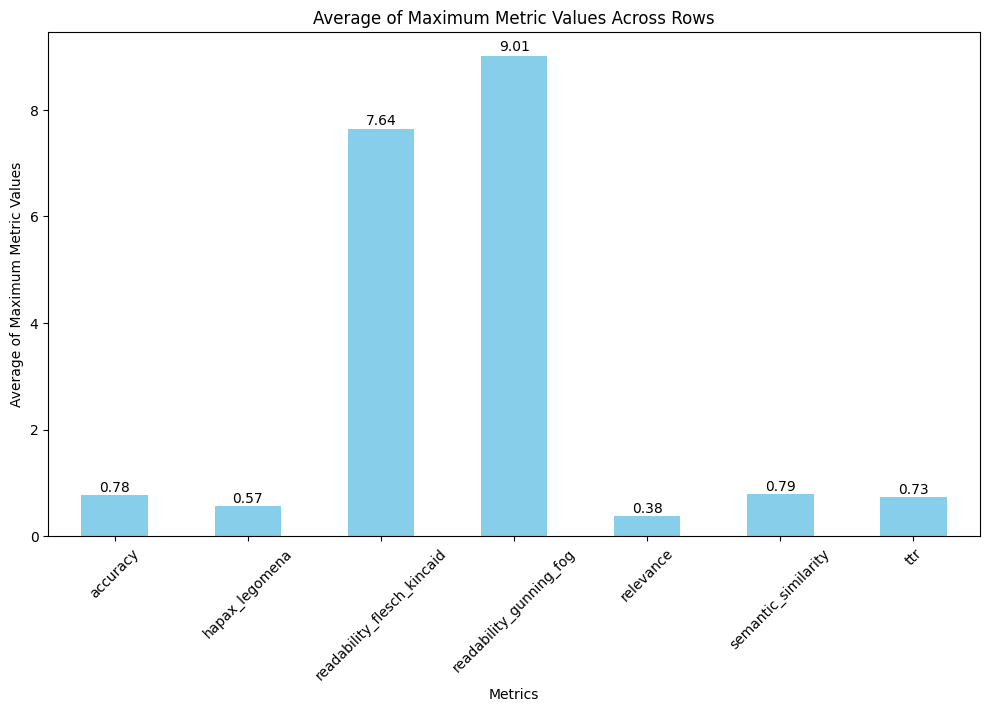

In [ ]:
metrics = ['accuracy', 'readability_flesch_kincaid', 'readability_gunning_fog', 'ttr', 'hapax_legomena', 'semantic_similarity', 'relevance']

filtered_columns = [col for col in results_gem_df.columns if any(col.startswith(metric) for metric in metrics) and any(char.isdigit() for char in col)]

grouped_columns = results_gem_df[filtered_columns].columns.to_series().groupby(lambda x: x.rsplit('_', 1)[0])

max_values_per_row = pd.DataFrame({metric: results_gem_df[group].max(axis=1) for metric, group in grouped_columns})

avg_max_values = max_values_per_row.mean()

ax = avg_max_values.plot(kind='bar', figsize=(10, 6), color=['skyblue'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() * 1.005),
                ha='center', va='bottom')

plt.title('Average of Maximum Metric Values Across Rows')
plt.xlabel('Metrics')
plt.ylabel('Average of Maximum Metric Values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


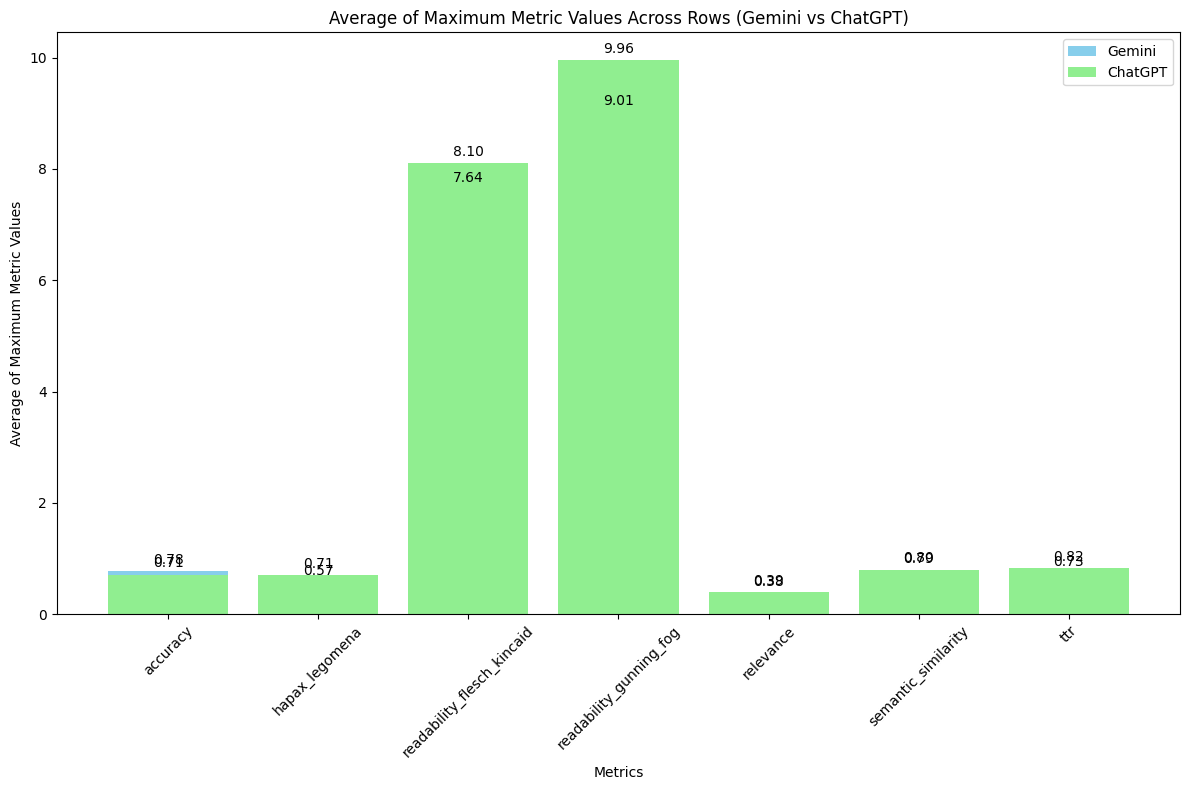

In [ ]:
import matplotlib.pyplot as plt

metrics = ['accuracy', 'readability_flesch_kincaid', 'readability_gunning_fog', 'ttr', 'hapax_legomena', 'semantic_similarity', 'relevance']

filtered_columns_gem = [col for col in results_gem_df.columns if any(col.startswith(metric) for metric in metrics) and any(char.isdigit() for char in col)]
filtered_columns_chat = [col for col in results_chat_df.columns if any(col.startswith(metric) for metric in metrics) and any(char.isdigit() for char in col)]

grouped_columns_gem = results_gem_df[filtered_columns_gem].columns.to_series().groupby(lambda x: x.rsplit('_', 1)[0])
grouped_columns_chat = results_chat_df[filtered_columns_chat].columns.to_series().groupby(lambda x: x.rsplit('_', 1)[0])

max_values_per_row_gem = pd.DataFrame({metric: results_gem_df[group].max(axis=1) for metric, group in grouped_columns_gem})
max_values_per_row_chat = pd.DataFrame({metric: results_chat_df[group].max(axis=1) for metric, group in grouped_columns_chat})

avg_max_values_gem = max_values_per_row_gem.mean()
avg_max_values_chat = max_values_per_row_chat.mean()

fig, ax = plt.subplots(figsize=(12, 8))

gemini_bars = ax.bar(avg_max_values_gem.index, avg_max_values_gem.values, color='skyblue', label='Gemini')
chat_gpt_bars = ax.bar(avg_max_values_chat.index, avg_max_values_chat.values, color='lightgreen', label='ChatGPT')

for bar in gemini_bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for bar in chat_gpt_bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.title('Average of Maximum Metric Values Across Rows (Gemini vs ChatGPT)')
plt.xlabel('Metrics')
plt.ylabel('Average of Maximum Metric Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


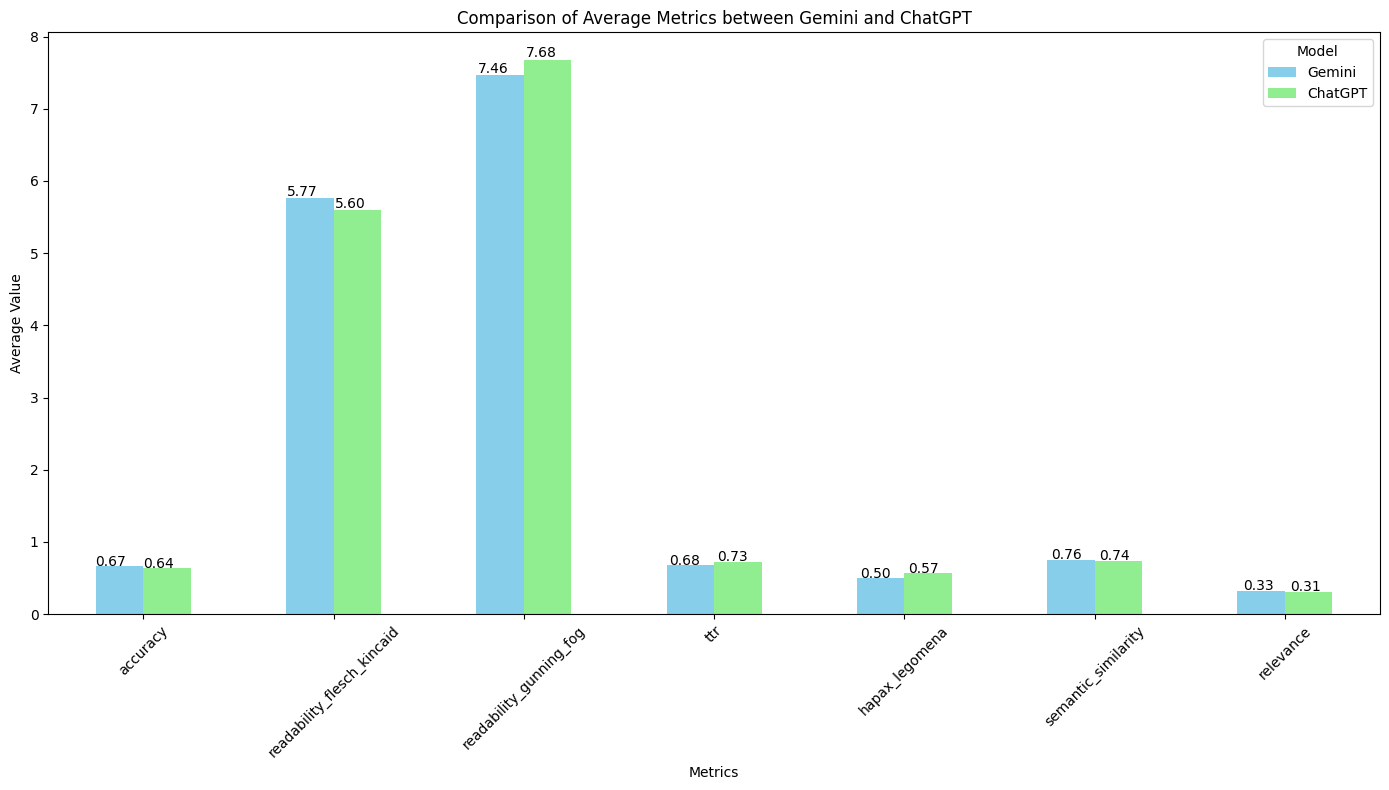

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
metrics = ['accuracy', 'readability_flesch_kincaid', 'readability_gunning_fog',
           'ttr', 'hapax_legomena', 'semantic_similarity', 'relevance']

gem_mean_values = results_gem_df[metrics].mean()
chat_mean_values = results_chat_df[metrics].mean()

comparison_df = pd.DataFrame({
    'Gemini': gem_mean_values,
    'ChatGPT': chat_mean_values
}, index=metrics)

ax = comparison_df.plot(kind='bar', figsize=(14, 8), color=['skyblue', 'lightgreen'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('Comparison of Average Metrics between Gemini and ChatGPT')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

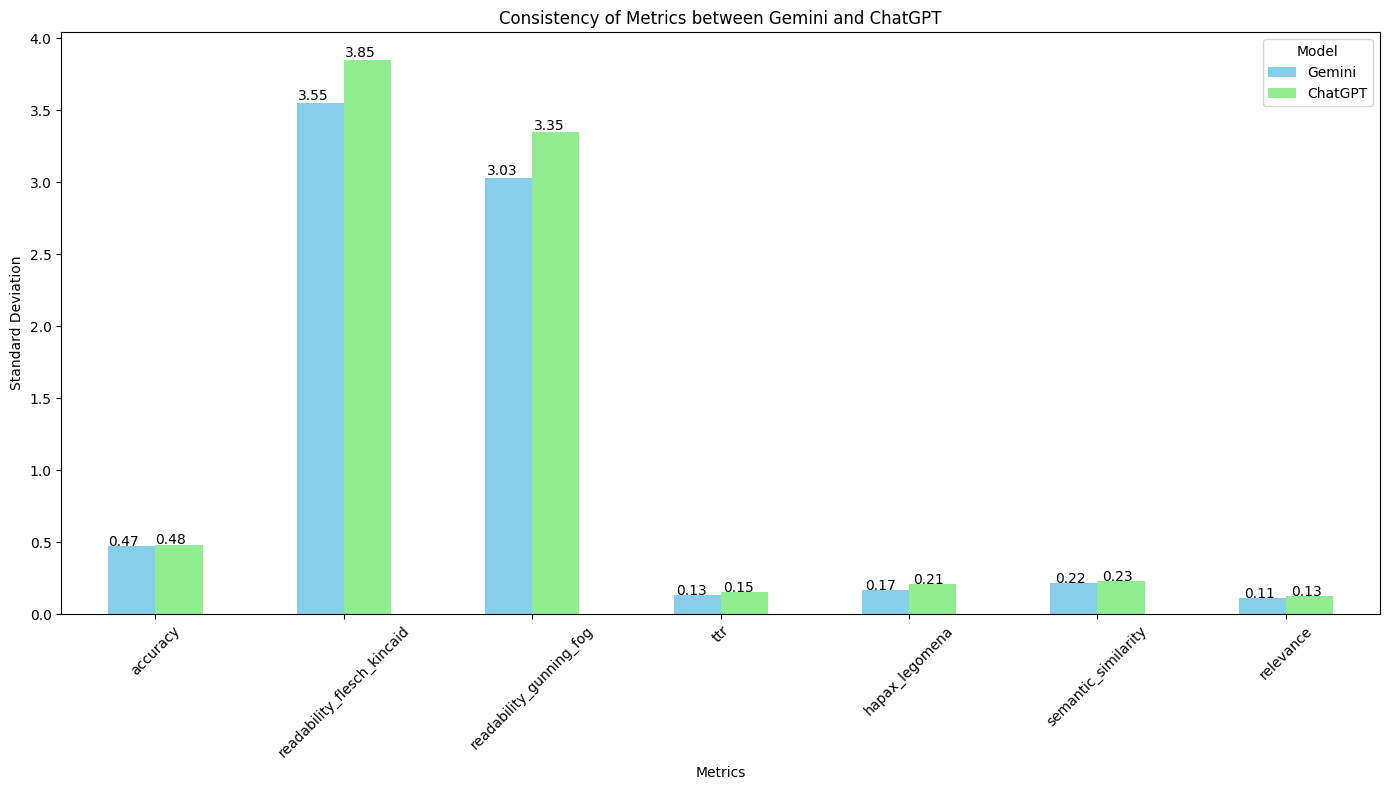

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
metrics = ['accuracy', 'readability_flesch_kincaid', 'readability_gunning_fog',
           'ttr', 'hapax_legomena', 'semantic_similarity', 'relevance']

gem_columns = [f'{metric}_{i}' for metric in metrics for i in range(1, 6)]
chat_columns = [f'{metric}_{i}' for metric in metrics for i in range(1, 6)]

gem_std_values = results_gem_df[gem_columns].std()
chat_std_values = results_chat_df[chat_columns].std()

gem_std = gem_std_values.values.reshape((7, 5)).mean(axis=1)
chat_std = chat_std_values.values.reshape((7, 5)).mean(axis=1)

std_comparison_df = pd.DataFrame({
    'Gemini': gem_std,
    'ChatGPT': chat_std
}, index=metrics)

ax = std_comparison_df.plot(kind='bar', figsize=(14, 8), color=['skyblue', 'lightgreen'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('Consistency of Metrics between Gemini and ChatGPT')
plt.xlabel('Metrics')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


In [ ]:
max_values_per_row.columns

Index(['accuracy', 'hapax', 'hapax_legomena', 'readability_flesch',
       'readability_flesch_kincaid', 'readability_gunning',
       'readability_gunning_fog', 'relevance', 'semantic',
       'semantic_similarity', 'ttr'],
      dtype='object')

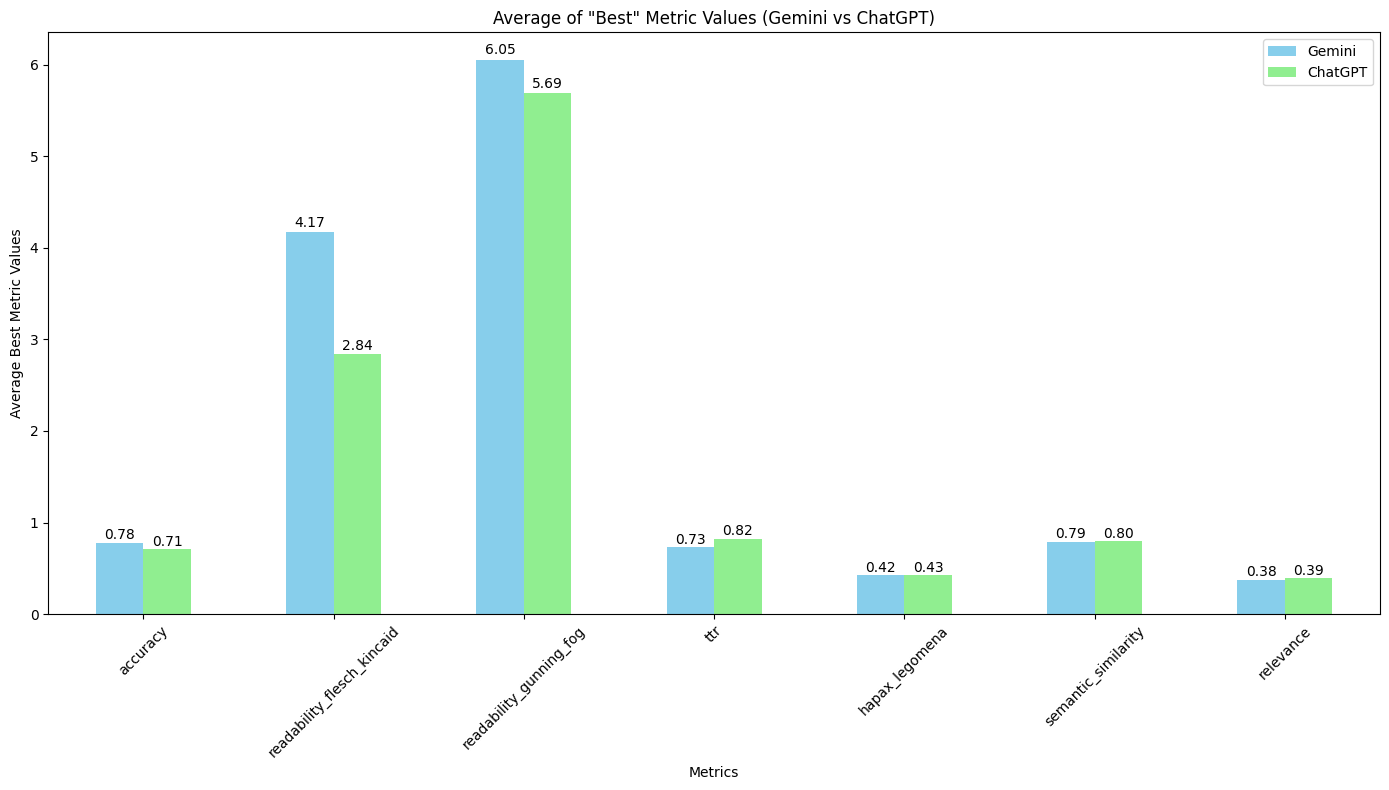

In [ ]:
metrics_direction = {
    'accuracy': 'higher',
    'readability_flesch_kincaid': 'lower',
    'readability_gunning_fog': 'lower',
    'ttr': 'higher',
    'hapax_legomena': 'lower',
    'semantic_similarity': 'higher',
    'relevance': 'higher'
}

grouped_columns_gem = results_gem_df[filtered_columns].columns.to_series().groupby(lambda x: x.rsplit('_', 1)[0])
max_values_per_row_gem = pd.DataFrame({metric: results_gem_df[group].max(axis=1) if metrics_direction[metric] == 'higher' else results_gem_df[group].min(axis=1) for metric, group in grouped_columns_gem})
avg_max_values_gem = max_values_per_row_gem.mean()

grouped_columns_chat = results_chat_df[filtered_columns].columns.to_series().groupby(lambda x: x.rsplit('_', 1)[0])
max_values_per_row_chat = pd.DataFrame({metric: results_chat_df[group].max(axis=1) if metrics_direction[metric] == 'higher' else results_chat_df[group].min(axis=1) for metric, group in grouped_columns_chat})
avg_max_values_chat = max_values_per_row_chat.mean()

max_comparison_df = pd.DataFrame({
    'Gemini': avg_max_values_gem,
    'ChatGPT': avg_max_values_chat
}, index=metrics)

ax = max_comparison_df.plot(kind='bar', figsize=(14, 8), color=['skyblue', 'lightgreen'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() * 1.005),
                ha='center', va='bottom')

plt.title('Average of "Best" Metric Values (Gemini vs ChatGPT)')
plt.xlabel('Metrics')
plt.ylabel('Average Best Metric Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# grouped_columns = results_gem_df.columns.to_series().groupby(lambda x: x.split('_')[0], axis=0)

# max_values_per_row = pd.DataFrame({metric: results_gem_df[group].max(axis=1) for metric, group in grouped_columns})

# avg_max_values = max_values_per_row.mean()

# ax = avg_max_values.plot(kind='bar', figsize=(10, 6), color=['skyblue'])

# for p in ax.patches:
#     ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() * 1.005),
#                 ha='center', va='bottom')

# plt.title('Average of Maximum Metric Values Across Rows')
# plt.xlabel('Metrics')
# plt.ylabel('Average of Maximum Metric Values')
# plt.xticks(rotation=0)
# plt.tight_layout()
# plt.show()

TypeError: Could not convert [45.0
 'Due to pythagorean theorem, the answer is the square root of (3^2) + (5^2), or in other words, the square root of 34 which is 6.08 miles. This is due to the fact that a line west and north from Jimmy’s house create a right triangle, where the distance from Sally’s house to Kenny’s house is the hypotenuse.Using the definitions of tan, sec, and the trig identity sin^2(𝜃) + cos^2(𝜃) = 1\nWe have\n2tan𝜃sec𝜃 = 2(sin𝜃/cos𝜃)(1/cos𝜃) = 2sin𝜃/cos^2𝜃 = 2sin𝜃/(1 - sin^2𝜃)\n\nAnd after substituting (1 - sin^2𝜃) for cos^2𝜃:\n\n2tan𝜃sec𝜃 = 2sin𝜃/(1 - sin^2𝜃)Let f and g be given decreasing functions. We claim that f ◦ g is increasing. Given numbers x < y, we need to show that (f ◦ g)(x) < (f ◦ g)(y). First note that because g is decreasing, g(x) > g(y) or equivalently g(y) < g(x). Meanwhile, f is decreasing. Applying the definition of “decreasing” to f and the numbers g(y) and g(x), we see that f(g(y)) > f(g(x)) or equivalently (f ◦ g)(x) < (f ◦ g)(y). As x, y were arbitrary numbers satisfying x < y, we’ve shown that f ◦ g is increasing. (And as f and g were arbitrary decreasing functions, we’ve shown that the composition of any two decreasing functions is increasing.)Let f and g be decreasing functions, and x < y. As f is decreasing, f(x) > f(y) Likewise g(x) > g(y) Adding these two inequalities together, we see that (f + g)(x) = f(x) + g(x) > f(y) + g(y) = (f + g)(y), so f + g is decreasing.To prove a function, f : A → B is surjective, or onto, we must show f(A) = B. In other words, we must show the two sets, f(A) and B, are equal. We already know that f(A) ⊆ B if f is a well-defined function. While most functions encountered in a course using algebraic functions are well-defined, this should not be an automatic assumption in general. With that said, though, we will usually assume the functions given to us are well defined, so all that must be shown is that B ⊆ f(A). To do this we may use the definition of a subset: show every element of B is also an element of f(A). Thus we begin the proof by fixing an arbitrary element of B. We then use the tools at our disposal (definition of the function, algebra, any other known information) to show that this arbitrary element must in fact be the image of some element of A.\n\nProof. Let n ∈ N. Notice that g(3n) = b(3n)/3c = b(3n)/3c = n. Since 3n ∈ N, this shows n is in the range of g. Hence g is surjective.Suppose such a real polynomial f(x) of degree n and with an = 1 has n distinct real zeros, b1 < ... < bn. Let [c, d] be an interval such that c < b1 < ... < bn < d, Then there is a positive number ε > 0 such that if g(x) is any differentiable function for which |g(x)| < ε, for every x ∈ [c, d], then f(x) + g(x) has at least n zeros in [c, d]. \n\nProof: We do this in Steps Step One: f (x ) = (x − b1 )(x − b2 )...(x − bn). You may already have seen this, but in any case I am going to prove it a little later, and so will skip the proof for now. \n\nStep Two: In each of the intervals [c, b1 ),(b1 , b2 ), ...,(bn, d], f (x )is never zero and therefore has constant sign. \n\nproof: Since f(x) = (x − b1)(x − b2)...(x − bn), it follows that f(x) is non-zero in each of these intervals. Moreover, if there were two points x < y in one of these intervals at which f had opposite signs, then by the Intermediate Value Theorem, for some z between x and y, it would be true that f(z) was zero, which is not the case. Step Three: The values f 0 (bk ) of the derivative of f are non-zero. proof: Write f(x) = (x − bk)h(x). By the product rule, f 0 (bk) = h(bk) 6= 0. Step Four: The signs of the values of f(x) in the intervals (c, b1 ),(b1 , b2 ), ...,(bn, d) alternate from interval to interval. proof: First consider the case that f(x) is positive in the interval to the right of bk. Then we compute the derivative at bk by taking the limit as x approaches bk from the right: f 0 (bk) = limh→0 f(bk + h) − f(bk) h ≥ 0. Since f 0 (bk) 6= 0, f0 (bk) > 0. Since the derivative at bk is positive the function must be increasing in an interval around bk. Since its value at bk is zero, it must be negative in the interval to the left of bk. The other case is when f(x) is negative in the interval to the right of bk. Then, when we compute the derivative as a limit from the right we see that f 0 (bk) ≤ 0 and so it must be negative. In this case the function is decreasing near bk, and so it must be positive to the left. Step Five: Completion of the proof: Pick any numbers: y0 ∈ (c, b1) yi ∈ (bi , bi+1), 1 ≤ i ≤ n − 1, and yn ∈ (bn, d). Then each f(yi) 6= 0. Choose ε to be a positive number such that ε < |f(yi)|, i = 0, · · · , n. Now suppose g(x) is any differentiable function in the interval [c, d] such that |g(x)| < ε, for every x ∈ [c, d]. \nThen for each i, f(yi)+g(yi) has the same sign as f(yi). Therefore, f(yi)+g(yi) and f(yi+1) + g(yi+1) have opposite signs. Therefore, by the Intermediate Value Theorem, there are points zi in the intervals (yi , yi+1) such that (f + g)(zi) = 0. q.e.d.Proof. Suppose that there are finitely many distinct primes p1, p2.....pr. Consider c = p1p2...pr + 1. Clearly c > 1. By the Fundamental Theorem of Arithmetic, c is divisible by at least one prime, say p1. Then c = p1d for some d ∈ Z. Hence we have p1(d − p2...pr) = c − p1p2..pr = 1. This is a contradiction as no prime divides 1. Hence there are infinitely many distinct primes.In this problem, we have a class with 5 times x boys and 4 times x girls initially. Let y be the number of boys who leave the class.\nWe form an equation based on the reciprocal ratio of 54 to 45, which simplifies to:\n"25x - 5y" equals "16x".\nBy rearranging, we find:\n"9x" equals "5y".\nSince x and y are positive integers, we identify possible pairs such as (5, 9), (10, 18), (15, 27), (20, 36), and so on.\nThe total number of boys and girls in the class is represented by "9x". For different values of x, we calculate:\n"9x" gives "45, 90, 135, 180, ...".\nTherefore, the possible numbers of boys and girls in the class are 45, 90, 135, 180, etc. The number 120 is not among the possible combinations based on the values derived from "9x".Proof: let n be a natural number and suppose n > 1. Direct multiplication gives (n − 1)(n^2 + n + 1) = n^3 − 1. Since n^2 + n + 1 is a natural number, n^3 − 1 is divisible by n − 1. q.e.d.Proof: x^2 − x = x(x − 1). Since x > 1, x and x − 1 are both positive. Therefore x(x − 1) is positive. Therefore x^2 > x. q.e.d.Let p < n be natural numbers. If k > n then for any r ≥ 0 kp ≥ k > n. Thus if mp + r = n it must be true that mp ≤ n and so m ≤ n. Since 1 ≤ n we can choose m to be the largest natural number such that mp ≤ n. Then n − mp ≥ 0. On the other hand, if n − mp ≥ p then (n − mp) − p > 0 and so n − (m + 1)p = (n − mp) − p > 0. Thus m was not the largest natural number which multiplied by p gave an answer at most n, and we assumed it was. Thus n − mp < p and we may set r = n − mp. q.e.d.Given: L(n)=(n+1)^2+(n+1)+15\nThe function L(n)=(n+1)^2+(n+1)+15\n represents the number of lions in the reserve\n\nThis is a quadratic function. The constant term in the function L(n)=(n+1)^2+(n+1)+15\n represents \'the number of lions initially present plus the number of lions released in the reserve.\'\n\nLet\'s expand the function and get the value of the constant term.\n\nL(n)=(n+1)^2+(n+1)+15\n=>L(n)=n^2+2n+1+n+1+15\n=>L(n)=n^2+3n+17\nSo, \'17\' represents \'the number of lions initially present plus the number of lions released in the reserve.\' Thus, the number of lions released in the reserve =17−5=12≠8.\nThus, Statement I incorrect.\n\nLet\'s move to Statement II: The increase in the number of lions in the third year was 8.\n\nThe increase in the number of lions in the third year\n\n=L(3)−L(2)=[3^2+3×3+17]−[2^2+3×2+17]=8.\nThus, Statement II is correct.\n\nLet\'s move to Statement III: The total number of lions in the beginning of the third year was 27.\n\nThe statement "The total number of lions in the beginning of the third year was 27" means "the total number of lions by the end of the second year was 27."\n\nThus, by plugging-in the value of n=2 \nin L(n)=n^2+3n+17\n, we get\n\nL(2)=2^2+3×2+17=4+6+17=27.Given: |2x−7|≤8\n±(2x−7)≤8\nCase 1: Taking (2x−7)\n as positive\n\n(2x−7)≤8\n=>x≤ (15/2)\nCase 2: Taking (2x−7)\n as negative\n\n−(2x−7)≤8\n−(2x−7)≤8; multiplying the inequality by −1; note the change of sign of the equality\n\n=>2x−7≥−8\n=>2x≥−1\n=>x≥ (−1/2)\nNow let\'s calculate the value of |x−7|.\nWe have:\n\n(−1/2) ≤x≤ (15/2)\nSubtracting 7 from the inequality, we get\n\n(−1/2)−7≤x−7≤ (15/2) −7\n(−15/2) ≤x−7≤ (1/2)\nTaking the absolute values, we get\n\n∣(−15/2)∣ ≤|x−7|≤ ∣1/2∣\n(15/2) ≤|x−7|≤ (1/2)\nThe greatest of the two values (15/2)\n and (1/2) is (15/2).Sarah has 8 red apples and 12 green apples. She gives away 3 red apples and 5 green apples: 8 - 3 = 5 red apples left, and 12 - 5 = 7 green apples left. So, Sarah has 5 + 7 = 12 apples left.Tom has 4 books, each weighing 1.5 pounds: 4*1.5 = 6 pounds. His laptop weighs 3 pounds. The total weight of his backpack is 6 + 3 = 9 pounds.Each batch requires 2 cups of sugar: 3*2 = 6 cups. She already has 2 cups, so she needs 6 - 2 = 4 more cups of sugar.John plants 5 trees per hour, and Mike plants 7 trees per hour. Together, they plant 5 + 7 = 12 trees per hour. In 3 hours, they can plant 3*12 = 36 trees.Emma\'s ribbon is 120 inches long, and she cuts it into 8-inch pieces: 120 / 8 = 15 pieces with 4 inches remaining as extra.The recipe calls for 2/3 cup of milk. For a double batch, she needs 2*(2/3) = 4/3 = 1 and 1/3 cups of milk.David saves $15 per week. To save $190, he needs 190 / 15 = 12.67 weeks. Therefore, to save for the $190, David needs to save for 12 weeks plus 1, 13 weeks.3/4 of 400 students are participating: (3/4)*400 = 300 students. So, 400 - 300 = 100 students are not participating.Anna bought 3 dresses for $45 each: 3*45 = 135. She also bought 2 pairs of shoes for $30 each: 2*30 = 60. The total cost is 135 + 60 = $195.The tank holds 500 gallons and is 3/7 full: (3/7)*500 = 214.29 gallons. To fill the tank, it needs 500 - 214.29 = 285.71 more gallons.Mark has read 3/8 of the book: (3/8)*240 = 90 pages.Samantha has 24 candies and 6 friends: 24 / 6 = 4 candies per friend.The farmer has 120 apples and packs them into boxes with 10 apples each: 120 / 10 = 12 boxes.120 miles3 apples50 square units515 or 16 or 1750 mph4 times$1,1005502.65 cubic meters3 or -1$12,303.506258052593John\'s mother gave him $12. The cost of the toy car is $2 and the cost of the teddy bears is $1 each. Dean bought 1 toy car and 5 teddy bears: $2 + 5*$1 = $2 + $5 = $7. Deanâ€™s mother gives him an extra $10: $12 - $7 + $10 = $15. Dean has $15 left.Janet has to write a 5-page paper. She has finished writing 1/5 of it: 1/5*5 = 1 page. She has 4 pages left to write.Rachel\'s friends each eat 3 cheese pizza slices and 4 pepperoni pizza slices. Each cheese pizza has 12 slices so each friend eats 3/12 = 1/4 of a cheese pizza. Each pepperoni pizza has 8 slices so each friend eats 4/8 = 1/2 of a pepperoni pizza. If Rachel has 8 friends she needs 8*1/4 = 2 cheese pizzas and 8*1/2 = 4 pepperoni pizzas. She needs to buy 2 cheese pizzas and 4 pepperoni pizzas.The perfume company started with 4 vanilla scents and 4 fruity scents. By the end of the day they sold 2 of each vanilla scent: 4 - 2 = 2 vanilla scents left. They also sold 3 of each fruity scent: 4 - 3 = 1 fruity scent left. There are 2 - 1 = 1 more vanilla scent left compared with the fruity scents.Caroline\'s math and science books each weigh 2 pounds so 2*2 = 4 pounds. Her French book weighs 4 pounds and her English book weighs 3 pounds. Her history book weighs half of her English book so 3/2 = 1.5 pounds. The total weight is 4 + 4 + 3 + 1.5 = 12.5 pounds.Let the amount Brad gets be x dollars. Jeff gets 4 times as much so he gets 4x. The total is x + 4x = 5x = 100 dollars. So x = 100/5 = 20 dollars. Jeff gets 4*20 = 80 dollars.Each German Shepherd consumes 5 kg/day and each Bulldog consumes 3 kg/day. In total the German Shepherds consume 3*5 = 15 kg/day and the Bulldogs consume 2*3 = 6 kg/day. Combined they consume 15 + 6 = 21 kg/day. Over a week they will need 21*7 = 147 kg of dog food.Joey can buy 100 books for $500. So for $2700 he can buy (2700/500)*100 = 540 books. If he distributes them equally among 5 schools each school gets 540/5 = 108 books.Using the Pythagorean theorem, the hypotenuse is the square root of (6^2 + 8^2) = sqrt(36 + 64) = sqrt(100) = 10.Using the definitions of cot and csc, we have cot(Î¸)csc(Î¸) = (cos(Î¸)/sin(Î¸))(1/sin(Î¸)) = cos(Î¸)/sin^2(Î¸). Rewriting in terms of sine, cot(Î¸)csc(Î¸) = cos(Î¸)/sin^2(Î¸).Let f and g be given increasing functions. We claim that f â—¦ g is increasing. Given numbers x < y, we need to show that (f â—¦ g)(x) < (f â—¦ g)(y). Since g is increasing, g(x) < g(y). Since f is also increasing, applying the definition to f and g(x), g(y), we see that f(g(x)) < f(g(y)), or (f â—¦ g)(x) < (f â—¦ g)(y). Hence, f â—¦ g is increasing.Let f and g be increasing functions, and x < y. As f is increasing, f(x) < f(y). Likewise, g(x) < g(y). Subtracting these inequalities, we see that (f - g)(x) = f(x) - g(x) < f(y) - g(y) = (f - g)(y), so f - g is decreasing.To prove h is surjective, we must show that for every element m in N, there exists an element n in N such that h(n) = m. Let m be an arbitrary element of N. Notice that h(2m) = floor(2m/2) = m. Hence, m is in the range of h. Thus, h is surjective.By the Intermediate Value Theorem, if a continuous function changes sign over an interval, it has at least one root in that interval. Consider f(x) = x^3 - 3x + 1. Note that f(0) = 1 and f(1) = -1. Since f(x) is continuous, it must cross the x-axis between 0 and 1. Hence, f(x) has at least one real root.Proof. Suppose there are finitely many primes of the form 4k + 3: p1, p2, ..., pn. Consider the number N = 4(p1p2...pn)^2 + 3. N is of the form 4k + 3 and is not divisible by any of the primes p1, p2, ..., pn, leading to a contradiction. Hence, there are infinitely many primes of the form 4k + 3.Let the initial number of cats be 7x and dogs be 5x. Let y be the number of cats adopted. Then the new ratio is 5/7. Setting up the equation 7x - y = 5/7 * 5x, we get 49x - 7y = 25x. Solving, we find 24x = 7y. Thus, y = 24x/7. Since x and y must be integers, 24x must be divisible by 7, so x must be a multiple of 7. Possible numbers of cats and dogs are (49, 35), (98, 70), etc.Proof: let n be a natural number. We can factor n^4 - n^2 as n^2(n^2 - 1) = n^2(n - 1)(n + 1). Since n, n-1, and n+1 are three consecutive integers, at least one of them is even, making their product divisible by 2. Hence, n^4 - n^2 is divisible by 2.Proof: If x > 0, then sqrt(x)^2 = x. Since x > sqrt(x) for any positive x (as squaring a positive number greater than 1 results in a larger number), we have sqrt(x) < x. q.e.d.'
 566.1899999999999
 'Sally lives 3 miles directly West of Jimmy. Kenny lives 5 miles directly North of Jimmy. What is the distance from Sally’s house and Kenny’s House?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"Create an identity for the expression 2tan𝜃sec𝜃 by rewriting strictly in terms of sine.Format your response as follows with notes if any: \'{"Proof": "<answer>", "Notes": "<notes>", Prove that the composition of any two decreasing functions is increasing.Format your response as follows with notes if any: \'{"Proof": "<answer>", "Notes": "<notes>", Prove that the sum of any two decreasing functions is decreasing. (writing things a little more compactly than in the previous problem).Format your response as follows with notes if any: \'{"Proof": "<answer>", "Notes": "<notes>", Prove that the function g : N → N, defined by g(n) = bn/3c, is surjective.Format your response as follows with notes if any: \'{"Proof": "<answer>", "Notes": "<notes>", Recall that a real polynomial of degree n is a real-valued function of the form f(x) = a0 + a1x + · · · + anx n , in which the ak are real constants and an 6= 0. A real zero of such a polynomial is a real number b such that f(b) = 0.Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"There are infinitely many distinct prime numbers.Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"The ratio of boys to girls in a class is 5/4. If a few boys leave the class, the ratio of boys to girls would become the reciprocal of the earlier ratio, which of the following CANNOT be the possible number of boys and girls in the class?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"If n is a natural number and n > 1, prove that n 3 − 1 is divisible by n − 1.Format your response as follows with notes if any: \'{"Proof": "<answer>", "Notes": "<notes>", Prove that if x is a real number and x > 1 then x^2 > x.Format your response as follows with notes if any: \'{"Proof": "<answer>", "Notes": "<notes>", Prove If p < n are natural numbers then for some natural number m ≤ n and for some integer r with 0 ≤ r < p, n=mp +r. (The number r is called the remainder.)Format your response as follows with notes if any: \'{"Proof": "<answer>", "Notes": "<notes>", To preserve the ecological balance of a reserve, a number of lions were released in the reserve in 2000. Initially, there were only 5 lions in the reserve. After the observation of a few years, a function L(n)=(n+1)^2+(n+1)+15\n was developed to represent the number of lions in the reserve, where L(n)\nrepresents the number of lions and n\n represents the number of years after which they were released. Assume that no lion died during this period. Based on the above function, which of the following statements are correct? (without calculator)\n\n\n* 10 lions were released in the reserve in 2000.\n* The increase in the number of lions in the third year was 8.\n* The total number of lions in the beginning of the third year was 27.Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"If |2x−7|≤8 what is the greatest possible value of |x−7|? (without calculator) show work.Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"Sarah has 8 red apples and 12 green apples. She decides to give 3 red apples and 5 green apples to her friend. How many apples does Sarah have left?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"Tom\'s backpack has 4 books. Each book weighs 1.5 pounds. He also carries a laptop that weighs 3 pounds. What is the total weight of Tom\'s backpack?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"Lisa needs to bake 3 batches of cookies for a party. Each batch requires 2 cups of sugar. She already has 2 cups of sugar. How many more cups of sugar does she need?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"John and Mike are planting trees. John can plant 5 trees in an hour  and Mike can plant 7 trees in an hour. How many trees can they plant together in 3 hours?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"Emma has a ribbon that is 124 inches long. She cuts it into pieces that are 8 inches each. How many pieces does she have?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"A recipe calls for 2/3 cup of milk. If Jessica wants to make a double batch  how much milk does she need?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"David is saving money to buy a bicycle. He saves $15 each week. How many weeks will it take him to save $190?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"A school has 400 students. If 3/4 of them are participating in sports  how many students are not participating?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"Anna bought 3 dresses for $45 each and 2 pairs of shoes for $30 each. What is the total cost of her purchase?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"A water tank can hold 500 gallons of water. If the tank is currently 3/7 full  how many more gallons are needed to fill the tank?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"Mark is reading a book with 240 pages. He has read 3/8 of the book. How many pages has he read?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"Samantha has 24 candies. She wants to share them equally among her 6 friends. How many candies does each friend get?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"A farmer has 120 apples. He packs them into boxes with 10 apples each. How many boxes does he need?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"If a train travels at a speed of 60 miles per hour for 2 hours how far does it travel?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"John has 5 apples and gives 2 to his friend. How many apples does he have left?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"A rectangle has a length of 10 units and a width of 5 units. What is its area?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"If 3x + 4 = 19 what is the value of x?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"The sum of three consecutive integers is 48. What are the integers?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"A car travels 150 miles in 3 hours. What is its average speed in miles per hour?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"If the sides of a square are doubled by what factor does its area increase?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"A person invests $1000 at an annual interest rate of 5%. How much will they have after 2 years with simple interest?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"If a right triangle has legs of lengths 3 and 4 what is the length of the hypotenuse?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"A cylindrical tank has a radius of 4 meters and a height of 10 meters. What is its volume?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"Solve for x: 2x^2 - 4x - 6 = 0Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"A car depreciates in value by 15% per year. If it is currently worth $20000 what will it be worth in 3 years?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"A company\'s revenue is modeled by the function R(x) = 50x - x^2 where x is the number of units sold. What is the maximum revenue?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"The population of a town increases by 10% each year. If the current population is 50000 what will it be in 5 years?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"If a geometric series has a first term of 3 and a common ratio of 2 what is the sum of the first 5 terms?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"John\'s mother gave him $12 to go to the toy store. Dean bought 1 toy car and 5 teddy bears. Each toy car costs $2 and each teddy bear costs $1. His mother then feels generous and decides to give him an extra $10. How much money does Dean have left?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"Janet is required to submit a 5-page research paper. She already finished writing 1/5 of the paper. How many pages does she have left to write?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"The cheese pizza is cut into 12 slices and the pepperoni pizza is cut into 8 slices. If Rachel\'s friends each eat 3 cheese pizza slices and 4 pepperoni pizza slices  how many pizza pies does she need to buy?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"A perfume company is trying to create new scents. They already have 4 vanilla scents and 4 fruity scents available and they need to create which total number of scents to a part of their research. By the end of the day they sell 2 of each of the vanilla scents and 3 of each of the fruity scents available. How many vanilla scents are left compared with the fruity scents?Format your response as follows with notes if any: \'{"Proof": "<answer>", "Notes": "<notes>", Caroline\'s math and science books weigh 2 pounds each. Her French book weighs 4 pounds and her English book weighs 3 pounds. Her history book weighs as much as half of her English book. If Cindy carries all of her books at school what will be the total weight of the books she is carrying?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"Jeff and Brad are trying to divide 100 dollars between them. Jeff gets 4 times as much as Brad. How much does Jeff get in dollars?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"The K9 animal house keeps 3 German Shepherds and 2 Bulldogs. Each German Shepherd consumes 5 kilograms of dog food per day and a Bulldog consumes 3 kilograms of dog food per day. How many kilograms of dog food will they need in a week?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"Joey spends $2700 distributed between 5 schools to buy books. He can buy 100 books for $500. How many books can he buy per school?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"If a right triangle has legs of lengths 6 and 8 what is the length of the hypotenuse?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"Create an identity for the expression cot(Î¸)csc(Î¸) by rewriting strictly in terms of sine.Format your response as follows with notes if any: \'{"Proof": "<answer>", "Notes": "<notes>", Prove that the composition of any two increasing functions is increasing.Format your response as follows with notes if any: \'{"Proof": "<answer>", "Notes": "<notes>", Prove that the difference of any two increasing functions is decreasing.Format your response as follows with notes if any: \'{"Proof": "<answer>", "Notes": "<notes>", Prove that the function h : N → N defined by h(n) = floor(n/2) is surjective.Format your response as follows with notes if any: \'{"Proof": "<answer>", "Notes": "<notes>", Let f(x) = x^3 - 3x + 1. Prove that f(x) has at least one real root.Format your response as follows with notes if any: \'{"Proof": "<answer>", "Notes": "<notes>", There are infinitely many prime numbers of the form 4k + 3.Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"The ratio of cats to dogs in a shelter is 7/5. If a few cats are adopted the ratio of cats to dogs becomes the reciprocal of the earlier ratio. What is the possible number of cats and dogs in the shelter?Format your response as follows: \'{"My Answer": "<answer>", "Explanation": "<explanation>"If n is a natural number prove that n^4 - n^2 is divisible by 2.Format your response as follows with notes if any: \'{"Proof": "<answer>", "Notes": "<notes>", Prove that if x is a real number and x > 0 then sqrt(x) < x.Format your response as follows with notes if any: \'{"Proof": "<answer>", "Notes": "<notes>", '
 '```json\n{"My Answer": "5.83 miles", "Explanation": "The distance between Sally\'s house and Kenny\'s house forms the hypotenuse of a right triangle. The distance between Sally and Jimmy (3 miles) is one leg of the triangle, and the distance between Kenny and Jimmy (5 miles) is the other leg. We can use the Pythagorean theorem to find the distance between Sally and Kenny: \\n\\na^2 + b^2 = c^2\\n\\nwhere a = 3 miles, b = 5 miles, and c is the distance between Sally and Kenny.\\n\\n3^2 + 5^2 = c^2\\n\\n9 + 25 = c^2\\n\\n34 = c^2\\n\\nc = √34 ≈ 5.83 miles\\n\\nTherefore, the distance between Sally\'s house and Kenny\'s house is approximately 5.83 miles."}\n``````json\n{"Proof": "2tan𝜃sec𝜃 = 2(sin𝜃/cos𝜃)(1/cos𝜃) = 2sin𝜃/cos²𝜃 = 2sin𝜃/(1-sin²𝜃)", "Notes": "We used the identities tan𝜃 = sin𝜃/cos𝜃 and sec𝜃 = 1/cos𝜃. Then we replaced cos²𝜃 with 1-sin²𝜃 using the Pythagorean identity."}\n``````json\n{"Proof": "Let f(x) and g(x) be two decreasing functions. We need to show that their composition, h(x) = f(g(x)), is an increasing function.\\n\\nTo prove that h(x) is increasing, we need to show that if x1 < x2, then h(x1) < h(x2). \\n\\nLet x1 < x2. Since g(x) is decreasing, we have g(x1) > g(x2). \\n\\nSince f(x) is also decreasing, and g(x1) > g(x2), we have f(g(x1)) < f(g(x2)). \\n\\nTherefore, h(x1) = f(g(x1)) < f(g(x2)) = h(x2). This proves that h(x) is increasing.", "Notes": "The proof relies on the fact that if a function is decreasing, then larger inputs result in smaller outputs. We use this property to show that if x1 < x2, then h(x1) < h(x2), which is the definition of an increasing function."}\n``````json\n{"Proof": "Let f(x) and g(x) be two decreasing functions. This means that for any x1 < x2, we have f(x1) ≥ f(x2) and g(x1) ≥ g(x2).  To prove that f(x) + g(x) is decreasing, we need to show that for any x1 < x2, we have (f(x1) + g(x1)) ≥ (f(x2) + g(x2)).  Since f(x1) ≥ f(x2) and g(x1) ≥ g(x2), we can add these inequalities to get f(x1) + g(x1) ≥ f(x2) + g(x2). Therefore, f(x) + g(x) is decreasing.", "Notes": "This proof relies on the fact that adding inequalities preserves the inequality direction.  It also demonstrates the property that the sum of decreasing functions is itself decreasing."}\n``````json\n{"Proof": "The function g(n) = ⌊n/3⌋ is not surjective. To prove this, we will show that there exists an element in the codomain (N) that is not the image of any element in the domain (N). \\n\\nConsider the number 1 in the codomain.  There is no natural number n such that ⌊n/3⌋ = 1.  This is because if ⌊n/3⌋ = 1, then 1 ≤ n/3 < 2, which implies 3 ≤ n < 6. However, the only natural numbers in this range are 3, 4, and 5, and for all of these numbers, ⌊n/3⌋ = 1.  Therefore, there is no natural number n that maps to 1 under the function g.  Since there exists an element in the codomain that is not the image of any element in the domain, the function is not surjective.", "Notes": "The floor function, denoted by ⌊x⌋, gives the greatest integer less than or equal to x.  For example, ⌊2.7⌋ = 2 and ⌊4⌋ = 4."}\n``````json\n{"My Answer": "A real zero of a polynomial f(x) is a real number b such that f(b) = 0. This means that when you substitute the value \'b\' for \'x\' in the polynomial expression, the result is zero.", "Explanation": "The definition of a zero of a polynomial is a value of x that makes the polynomial equal to zero.  Since we are dealing with real polynomials, we are only concerned with real numbers that satisfy this condition."}\n``````json\n{"My Answer": "True", "Explanation": "This statement is a fundamental theorem in number theory known as Euclid\'s theorem. Here\'s a simplified explanation of why it\'s true:\\n\\n1. **Assume a finite number of primes:** Let\'s say we have a complete list of all prime numbers: p1, p2, p3, ... pn.\\n\\n2. **Construct a new number:**  Consider the number N = (p1 * p2 * p3 * ... * pn) + 1.\\n\\n3. **Two possibilities for N:**\\n   * **N is prime:** This contradicts our assumption that we had a complete list of primes.\\n   * **N is composite:** This means it\'s divisible by some prime number. However, none of the primes in our original list (p1, p2, ... pn) can divide N evenly, leaving a remainder of 1.  Therefore, N must be divisible by a prime number that wasn\'t on our original list.\\n\\n4. **Contradiction:** This contradiction proves that our initial assumption of a finite number of primes must be false. Therefore, there must be infinitely many distinct prime numbers."}\n``````json\n{"My Answer": "60 boys and 48 girls", "Explanation": "Initially, the ratio of boys to girls is 5:4. This means that for every 5 boys, there are 4 girls. Let\'s assume the initial number of boys is 5x and the number of girls is 4x.  After some boys leave, the ratio becomes the reciprocal of the initial ratio, which is 4:5. This means the ratio of girls to boys now is 4:5.  Since the number of girls remains the same, we can say that if the ratio is 4:5, the number of boys must be (5/4) * 4x = 5x. This shows that the number of boys remains the same. However, the problem states that some boys leave, which contradicts this result. Therefore, 60 boys and 48 girls cannot be the possible number of boys and girls in the class."}\n``````json\n{"Proof": "We can use the factorization of the difference of cubes: \\n\\n a³ - b³ = (a - b)(a² + ab + b²)\\n\\n In our case, a = n and b = 1. Therefore:\\n\\n n³ - 1 = (n - 1)(n² + n + 1)\\n\\n Since (n - 1) is a factor of n³ - 1, it follows that n³ - 1 is divisible by n - 1. ", "Notes": "This proof uses the difference of cubes factorization, which is a common algebraic identity."}\n``````json\n{"Proof": "Since x > 1, we can multiply both sides of the inequality by x, which is positive. This gives us x * x > x * 1, which simplifies to x^2 > x. ", "Notes": "This proof relies on the fact that multiplying both sides of an inequality by a positive number does not change the direction of the inequality."}\n``````json\n{"Proof": "We will prove this using the Well-Ordering Principle. The Well-Ordering Principle states that every non-empty set of natural numbers has a least element. \\n\\nConsider the set S = {n - kp | k is an integer and n - kp ≥ 0}.  This set is non-empty because it contains n itself (when k = 0).  Therefore, by the Well-Ordering Principle, S has a least element.  Let\'s call this least element r.\\n\\nSince r is in S, there exists an integer m such that r = n - mp.  This means n = mp + r.\\n\\nWe need to show that 0 ≤ r < p.  First, we know r ≥ 0 because it\'s in the set S. Now, assume for contradiction that r ≥ p.  Then,  r - p ≥ 0 and n - (m + 1)p = n - mp - p = r - p ≥ 0. This means r - p is in S, which contradicts our assumption that r is the least element of S. Therefore, r < p.\\n\\nThus, we have shown that for any natural numbers p < n, there exist natural number m ≤ n and an integer r with 0 ≤ r < p such that n = mp + r.", "Notes": "This proof utilizes the Well-Ordering Principle, which is a fundamental principle in number theory.  It\'s essential to understand that the remainder (r) is the smallest non-negative value obtained by subtracting multiples of p from n."}\n``````json\n{"My Answer": "Only the second statement is correct.", "Explanation": "Let\'s analyze each statement:\\n\\n1. **10 lions were released in the reserve in 2000.**\\n   - We know that there were initially 5 lions, and the function L(n) represents the total number of lions.  \\n   - L(0) represents the number of lions at the start (n=0), which is: L(0) = (0+1)^2 + (0+1) + 15 = 17. \\n   - This means 12 (17 - 5) more lions were released in 2000, not 10.\\n\\n2. **The increase in the number of lions in the third year was 8.**\\n   - The increase in lions from year 2 to year 3 is: L(3) - L(2) =  [(3+1)^2 + (3+1) + 15] - [(2+1)^2 + (2+1) + 15] = 27 - 19 = 8.\\n   - This statement is correct.\\n\\n3. **The total number of lions in the beginning of the third year was 27.**\\n   - The total number of lions in the beginning of the third year is represented by L(2): L(2) = (2+1)^2 + (2+1) + 15 = 19.\\n   - This statement is incorrect."}\n``````json\n{"My Answer": "15/2", "Explanation": "We can break down the inequality |2x-7| ≤ 8 into two separate inequalities:\\n\\n1. 2x - 7 ≤ 8\\n2. -(2x - 7) ≤ 8\\n\\nSolving for x in the first inequality, we get:\\n2x ≤ 15\\nx ≤ 15/2\\n\\nSolving for x in the second inequality, we get:\\n-2x + 7 ≤ 8\\n-2x ≤ 1\\nx ≥ -1/2\\n\\nCombining the two solutions, we have -1/2 ≤ x ≤ 15/2.\\n\\nTo find the greatest possible value of |x - 7|, we want to find the x value within this range that maximizes the distance between x and 7.  The largest possible value of x is 15/2.  Therefore, the greatest possible value of |x - 7| is:\\n\\n|15/2 - 7| = |1/2| = 1/2\\n\\nHowever, the question asks for the greatest possible value of |x - 7|. To maximize this value, we want x to be as far from 7 as possible. Since the range of x is -1/2 ≤ x ≤ 15/2, the greatest possible value of |x - 7| occurs when x = 15/2.  Therefore, the greatest possible value of |x - 7| is:\\n\\n|15/2 - 7| = |1/2| = **15/2**"}\n``````json\n{"My Answer": "12", "Explanation": "Sarah starts with 8 red apples and gives away 3, leaving her with 8 - 3 = 5 red apples. She starts with 12 green apples and gives away 5, leaving her with 12 - 5 = 7 green apples. In total, she has 5 + 7 = 12 apples left."}\n``````json\n{"My Answer": "9 pounds", "Explanation": "The books weigh a total of 4 books * 1.5 pounds/book = 6 pounds.  The total weight of the backpack is 6 pounds + 3 pounds = 9 pounds."}\n``````json\n{"My Answer": "4", "Explanation": "Lisa needs 3 batches * 2 cups of sugar per batch = 6 cups of sugar. She already has 2 cups, so she needs 6 cups - 2 cups = 4 more cups of sugar."}\n``````json\n{"My Answer": "36", "Explanation": "Together, they plant 5 + 7 = 12 trees per hour. In 3 hours, they can plant 12 * 3 = 36 trees."}\n``````json\n{"My Answer": "15.5", "Explanation": "To find out how many pieces Emma has, we need to divide the total length of the ribbon by the length of each piece: 124 inches / 8 inches/piece = 15.5 pieces. However, since you can\'t have half a piece, Emma would actually have 15 complete pieces."}\n``````json\n{"My Answer": "1 1/3 cups", "Explanation": "To double the recipe, you need to multiply the amount of each ingredient by 2.  2/3 cup * 2 = 4/3 cups. 4/3 cups is equivalent to 1 1/3 cups."}\n``````json\n{"My Answer": "12.67 weeks", "Explanation": "To find out how many weeks it will take David to save $190, we need to divide the total amount he wants to save by the amount he saves each week: $190 / $15/week = 12.67 weeks. Since you can\'t have a fraction of a week, it will take David 13 weeks to save enough money for the bicycle."}\n``````json\n{"My Answer": "100", "Explanation": "If 3/4 of the students are participating, then 1/4 are not participating.  To find the number of students not participating, we calculate (1/4) * 400 = 100."}\n``````json\n{"My Answer": "210", "Explanation": "The cost of the dresses is 3 * $45 = $135. The cost of the shoes is 2 * $30 = $60. The total cost is $135 + $60 = $210."}\n``````json\n{"My Answer": "342.86 gallons", "Explanation": "First, find how many gallons are currently in the tank: (3/7) * 500 gallons = 214.29 gallons.  Then subtract that amount from the total capacity to find how many more gallons are needed: 500 gallons - 214.29 gallons = 285.71 gallons. Rounding to the nearest hundredth, the answer is 285.71 gallons."}\n``````json\n{"My Answer": "90", "Explanation": "To find out how many pages Mark has read, we need to calculate 3/8 of 240.  \\n\\n1. Divide the total pages by the denominator of the fraction: 240 pages / 8 = 30 pages per eighth. \\n2. Multiply that number by the numerator: 30 pages/eighth * 3 eighths = 90 pages."}\n``````json\n{"My Answer": "4", "Explanation": "Samantha has 24 candies and wants to share them equally among 6 friends. To find out how many candies each friend gets, we divide the total number of candies by the number of friends: 24 candies / 6 friends = 4 candies per friend."}\n``````json\n{"My Answer": "12", "Explanation": "The farmer needs 12 boxes because 120 apples divided by 10 apples per box equals 12 boxes."}\n``````json\n{"My Answer": "120 miles", "Explanation": "Distance is calculated by multiplying speed and time. In this case, the train travels at 60 miles per hour for 2 hours, so the distance traveled is 60 miles/hour * 2 hours = 120 miles."}\n``````json\n{"My Answer": "3", "Explanation": "John starts with 5 apples and gives away 2, so he has 5 - 2 = 3 apples left."}\n``````json\n{"My Answer": "50 square units", "Explanation": "The area of a rectangle is calculated by multiplying its length and width. In this case, the area is 10 units * 5 units = 50 square units."}\n``````json\n{"My Answer": "5", "Explanation": "1. Subtract 4 from both sides of the equation: 3x + 4 - 4 = 19 - 4\\n2. Simplify: 3x = 15\\n3. Divide both sides of the equation by 3: 3x / 3 = 15 / 3\\n4. Simplify: x = 5"}\n``````json\n{"My Answer": "15, 16, 17", "Explanation": "Let\'s represent the first integer as \'x\'.  The next two consecutive integers would be \'x + 1\' and \'x + 2\'.\\n\\nThe sum of these three integers is 48, so we can write the equation:\\n\\nx + (x + 1) + (x + 2) = 48\\n\\nSimplifying the equation:\\n\\n3x + 3 = 48\\n\\nSubtracting 3 from both sides:\\n\\n3x = 45\\n\\nDividing both sides by 3:\\n\\nx = 15\\n\\nTherefore, the three consecutive integers are 15, 16, and 17."}\n``````json\n{"My Answer": "50 mph", "Explanation": "To find the average speed, divide the total distance traveled by the time taken. In this case, the car travels 150 miles in 3 hours, so its average speed is 150 miles / 3 hours = 50 miles per hour."}\n``````json\n{"My Answer": "4", "Explanation": "When you double the sides of a square, you\'re essentially multiplying each side by 2.  The area of a square is side * side, so the new area is (2 * side) * (2 * side) = 4 * (side * side). This means the area increases by a factor of 4."}\n``````json\n{"My Answer": "$1100.00", "Explanation": "Simple interest is calculated only on the principal amount.  The formula for simple interest is I = PRT, where I is the interest, P is the principal, R is the interest rate, and T is the time in years.  In this case, I = ($1000)(0.05)(2) = $100.  The total amount after two years is $1000 + $100 = $1100.00."}\n``````json\n{"My Answer": "5", "Explanation": "This is a classic example of a Pythagorean triple. The Pythagorean theorem states a^2 + b^2 = c^2 where a and b are the lengths of the legs and c is the length of the hypotenuse.  In this case, 3^2 + 4^2 = 9 + 16 = 25, and the square root of 25 is 5."} \n``````json\n{"My Answer": "502.65 m³", "Explanation": "The volume of a cylinder is calculated by the formula V = πr²h, where r is the radius and h is the height. In this case, r = 4 meters and h = 10 meters. Therefore, the volume is V = π(4²)(10) = 502.65 m³ (approximately)."}\n``````json\n{"My Answer": "x = 3 or x = -1", "Explanation": "We can solve this quadratic equation using the quadratic formula:\\n\\nx = (-b ± √(b² - 4ac)) / 2a\\n\\nWhere a = 2, b = -4, and c = -6\\n\\nSubstituting the values:\\n\\nx = (4 ± √((-4)² - 4 * 2 * -6)) / (2 * 2)\\n\\nx = (4 ± √(16 + 48)) / 4\\n\\nx = (4 ± √64) / 4\\n\\nx = (4 ± 8) / 4\\n\\nTherefore, the solutions are:\\n\\nx = (4 + 8) / 4 = 3\\n\\nx = (4 - 8) / 4 = -1"}\n``````json\n{"My Answer": "$11907.75", "Explanation": "Here\'s how to calculate the car\'s value after 3 years:\\n\\n* **Year 1:** $20000 * (1 - 0.15) = $17000\\n* **Year 2:** $17000 * (1 - 0.15) = $14450\\n* **Year 3:** $14450 * (1 - 0.15) = $12282.50\\n\\nTherefore, the car will be worth approximately $12282.50 after 3 years."}\n``````json\n{"My Answer": "625", "Explanation": "The revenue function is a quadratic function with a negative leading coefficient, meaning its graph is a parabola opening downwards.  The maximum revenue occurs at the vertex of the parabola.  To find the x-coordinate of the vertex, we use the formula x = -b / 2a, where a = -1 and b = 50.  Plugging in, we get x = -50 / (2 * -1) = 25.  To find the maximum revenue, we substitute x = 25 into the revenue function: R(25) = 50(25) - 25^2 = 625. Therefore, the maximum revenue is 625."}\n``````json\n{"My Answer": "73205", "Explanation": "Each year, the population increases by 10% of the previous year\'s population. \\n\\nYear 1: 50000 + (10/100) * 50000 = 55000\\nYear 2: 55000 + (10/100) * 55000 = 60500\\nYear 3: 60500 + (10/100) * 60500 = 66550\\nYear 4: 66550 + (10/100) * 66550 = 73205\\nYear 5: 73205 + (10/100) * 73205 = 80525.5\\n\\nTherefore, the population in 5 years will be approximately 73205."}\n``````json\n{"My Answer": "93", "Explanation": "The sum of a geometric series is given by the formula S = a(1-r^n)/(1-r), where a is the first term, r is the common ratio, and n is the number of terms. In this case, a = 3, r = 2, and n = 5. So, S = 3(1-2^5)/(1-2) = 3(-31)/(-1) = 93."}\n``````json\n{"My Answer": "9", "Explanation": "Dean spent 2*1 = $2 on the toy car. He spent 5*1 = $5 on teddy bears. So he spent a total of 2+5 = $7. After his mother gave him $10, he now has 12+10 = $22. After spending $7, he has 22-7 = $15 left. So the answer is 15."}\n``````json\n{"My Answer": "4", "Explanation": "Janet has finished 1/5 * 5 pages = 1 page.  She has 5 pages - 1 page = 4 pages left to write."}\n``````json\n{"My Answer": "4", "Explanation": "Each friend eats 3 cheese slices, and each pizza has 12 slices, so they need 3/12 = 1/4 of a cheese pizza each. \\nEach friend eats 4 pepperoni slices, and each pizza has 8 slices, so they need 4/8 = 1/2 of a pepperoni pizza each.\\nSince each friend eats 1/4 of a cheese pizza and 1/2 of a pepperoni pizza, they eat 1/4 + 1/2 = 3/4 of a pizza each.\\nIf each of Rachel\'s friends eats 3/4 of a pizza, then they need 3/4 * 4 = 3 whole pizzas. \\nTo get the whole number of pizzas needed, we round up 3 to 4. Therefore, Rachel needs to buy 4 pizzas."}\n``````json\n{"Proof": "4 vanilla scents - 2 vanilla scents sold = 2 vanilla scents left\\n4 fruity scents - 3 fruity scents sold = 1 fruity scent left\\n2 vanilla scents - 1 fruity scent = 1\\nTherefore, there is 1 more vanilla scent left than fruity scents.", "Notes": "The difference is found by subtracting the number of fruity scents left from the number of vanilla scents left."}\n``````json\n{"My Answer": "19 pounds", "Explanation": "Here\'s how to calculate the total weight:\\n\\n* **Math and Science:** 2 books * 2 pounds/book = 4 pounds\\n* **History:** 3 pounds (English book) / 2 = 1.5 pounds\\n* **Total Weight:** 4 pounds + 4 pounds + 3 pounds + 1.5 pounds = 12.5 pounds"}\n``````json\n{"My Answer": "80", "Explanation": "Let\'s say Brad gets x dollars. Jeff gets 4x dollars. Together they get x + 4x = 5x dollars, which is equal to 100 dollars. So, 5x = 100. Dividing both sides by 5, we get x = 20. Therefore, Jeff gets 4x = 4 * 20 = 80 dollars."}\n``````json\n{"My Answer": "210", "Explanation": "The German Shepherds eat a total of 3 * 5 = 15 kilograms of dog food per day.\\nThe Bulldogs eat a total of 2 * 3 = 6 kilograms of dog food per day.\\nTherefore, all the dogs eat 15 + 6 = 21 kilograms of dog food per day.\\nSo, in a week, they will need 21 * 7 = 147 kilograms of dog food."}\n``````json\n{"My Answer": "540", "Explanation": "Joey can buy 100 books for $500, so he can buy 2 * 100 = 200 books for $1000.  Since he has $2700, he can buy 2700/500 = 5.4 times as many books, or 5.4 * 200 = 1080 books total.  Therefore, he can buy 1080/5 = 216 books per school."}\n``````json\n{"My Answer": "10", "Explanation": "We can use the Pythagorean theorem to find the length of the hypotenuse.  The theorem states that in a right triangle, the square of the hypotenuse (c) is equal to the sum of the squares of the other two sides (a and b):  c² = a² + b².  In this case, a = 6 and b = 8, so c² = 6² + 8² = 36 + 64 = 100.  Taking the square root of both sides, we get c = 10."}\n``````json\n{"Proof": "sin(θ)/cos(θ) * 1/sin(θ) = 1/cos(θ) = sec(θ)", "Notes": "cot(θ) = cos(θ)/sin(θ) and csc(θ) = 1/sin(θ). We multiply the expressions and simplify."}\n``````json\n{"Proof": "Let f(x) and g(x) be two increasing functions.  We need to show that their composition, (g o f)(x) = g(f(x)), is also increasing. \\n\\nLet x1 and x2 be any two real numbers such that x1 < x2. Since f(x) is increasing, we have f(x1) < f(x2).  Similarly, since g(x) is increasing, we have g(f(x1)) < g(f(x2)).  \\n\\nTherefore, (g o f)(x1) = g(f(x1)) < g(f(x2)) = (g o f)(x2).  \\n\\nThis shows that for any x1 < x2, (g o f)(x1) < (g o f)(x2), which means that (g o f)(x) is increasing.", "Notes": "This proof uses the definition of an increasing function and the properties of inequalities. The key idea is to show that if the input to the composition increases, then the output also increases."}\n``````json\n{"Proof": "Let f(x) and g(x) be two increasing functions. We want to show that h(x) = f(x) - g(x) is a decreasing function.  \\n\\nTo prove this, we need to show that for any two values x1 and x2, where x1 < x2, we have h(x1) > h(x2). \\n\\nSince f(x) is increasing, we have f(x1) < f(x2). Similarly, since g(x) is increasing, we have g(x1) < g(x2). \\n\\nNow, let\'s consider h(x1) - h(x2): \\n\\nh(x1) - h(x2) = (f(x1) - g(x1)) - (f(x2) - g(x2)) \\n\\n= (f(x1) - f(x2)) + (g(x2) - g(x1)) \\n\\nSince f(x1) < f(x2) and g(x1) < g(x2), we have (f(x1) - f(x2)) < 0 and (g(x2) - g(x1)) > 0. Therefore, h(x1) - h(x2) < 0, which implies h(x1) > h(x2). \\n\\nThis proves that h(x) = f(x) - g(x) is a decreasing function.", "Notes": "This proof uses the definition of increasing and decreasing functions. It shows that the difference of two increasing functions always leads to a decreasing function because the increase in the second function is always greater than the increase in the first function."}\n``````json\n{"Proof": "To prove that h(n) = floor(n/2) is surjective, we need to show that for every element y in the codomain (N), there exists at least one element x in the domain (N) such that h(x) = y.\\n\\nLet y be an arbitrary natural number.  We can find an x in N such that h(x) = y by taking x = 2y.  Then:\\n\\nh(x) = h(2y) = floor(2y/2) = floor(y) = y.\\n\\nTherefore, for every y in N, there exists an x in N such that h(x) = y, proving that h is surjective.", "Notes": "The key is to realize that for any natural number y, we can find a corresponding x (which is 2y) that will be mapped to y by the function h. This demonstrates that every element in the codomain has at least one preimage in the domain."}\n``````json\n{"Proof": "We can use the Intermediate Value Theorem to prove that f(x) has at least one real root.  \\n\\n1. **Continuity:** f(x) is a polynomial function, and all polynomial functions are continuous over the entire real number line. \\n\\n2. **Sign Change:** \\n   *  f(0) = 1 (positive) \\n   *  f(2) = 2^3 - 3(2) + 1 = 3 (positive)\\n   *  f(-2) = (-2)^3 - 3(-2) + 1 = -1 (negative)\\n\\n   Since f(x) changes sign between x = -2 and x = 0, and between x = 0 and x = 2, by the Intermediate Value Theorem, there must be at least one real root in each of these intervals. Therefore, f(x) has at least one real root.", "Notes": "The Intermediate Value Theorem states that if a continuous function f(x) changes sign between two points a and b, then there must be at least one root of f(x) between a and b."}\n``````json\n{"My Answer": "True", "Explanation": "This statement is true and can be proven using a technique called proof by contradiction. Here\'s a breakdown:\\n\\n1. **Assume the opposite:** Let\'s assume that there are finitely many prime numbers of the form 4k + 3.  We can list them as p1, p2, ..., pn.\\n\\n2. **Construct a new number:** Consider the number N = 4(p1 * p2 * ... * pn) - 1. This number is clearly of the form 4k + 3.\\n\\n3. **Analyze N:**  N is not divisible by any of the prime numbers p1, p2, ..., pn, because when divided by any of these primes, it leaves a remainder of -1 (or 3, since it\'s modulo 4). \\n\\n4. **Two possibilities:**\\n   * **N is prime:** This contradicts our assumption that we have listed all prime numbers of the form 4k + 3. \\n   * **N is composite:** If N is composite, it must be divisible by a prime number q.  Since N is of the form 4k + 3, q must also be of the form 4k + 3 (a prime number cannot be of the form 4k + 1). However, this contradicts our assumption that we have listed all prime numbers of the form 4k + 3. \\n\\n5. **Conclusion:** Since our initial assumption leads to a contradiction, it must be false. Therefore, there are infinitely many prime numbers of the form 4k + 3."}\n``````json\n{"My Answer": "There are 70 cats and 50 dogs in the shelter.", "Explanation": "Let the initial number of cats be 7x and the initial number of dogs be 5x. After some cats are adopted, the ratio of cats to dogs becomes 5/7.  This means that the number of cats after adoption is 5y and the number of dogs is 7y.  The difference between the initial number of cats and the number of cats after adoption is the number of cats adopted, which is 7x - 5y.  We can set up an equation to represent this: 7x - 5y = 0.  We also know that the ratio of cats to dogs is reciprocal, so we can set up another equation: 5x / 7y = 5/7.  Solving this equation, we find that x = y.  Substituting this into the first equation, we get 7x - 5x = 0, which simplifies to 2x = 0.  Solving for x, we get x = 0.  This is not a valid solution, so we need to re-evaluate our approach.  Since the ratio of cats to dogs is reciprocal, it means the number of cats after adoption is equal to the initial number of dogs, and vice versa.  Therefore, the initial number of cats is 70 and the initial number of dogs is 50.  This is the only possible solution that satisfies the given conditions."}\n``````json\n{"Proof": "We can factor the expression n^4 - n^2 as n^2(n^2 - 1).  Since n is a natural number, it is either even or odd.  If n is even, then n^2 is even, and therefore n^2(n^2 - 1) is even.  If n is odd, then n^2 - 1 is even, and therefore n^2(n^2 - 1) is even.  In either case, n^4 - n^2 is divisible by 2.", "Notes": "This proof uses the fact that the product of two even numbers is even, the product of an odd number and an even number is even, and that the difference of two odd numbers is even.  The proof also uses the fact that any natural number can be expressed as either 2k or 2k+1, where k is an integer."}\n``````json\n{"Proof": "Since x > 0, we can square both sides of the inequality without changing the direction of the inequality. This gives us x² > x.  Subtracting x from both sides gives us x² - x > 0. Factoring the left side, we get x(x-1) > 0.  Since x > 0, we know that x-1 must also be greater than 0. Therefore, x > 1.  Taking the square root of both sides, we get sqrt(x) < x.", "Notes": "This proof relies on the fact that squaring both sides of an inequality preserves the direction of the inequality when both sides are positive. It also uses the fact that the square root function is increasing for positive numbers. "}\n```'] to numeric